# Loan Data from Prosper
## by Paula Roigés

## Investigation Overview

The main goals of this project are to gather insights to understand how different variables affects the quality of the loans.
Objectives:
1. Customer Profile
2. Categories likely to Default
3. Influence of Term on Risk
4. Inflience of Rist on Estimated Return

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
pl_df = pd.read_pickle('pl_df')

### Prosper Forecastig based on Estimation

Prosper bases its development on **estimated return**, which is assigned to the listing at the time it was created and it is the difference between the Estimated Effective Yield and the Estimated Loss Rate.

It is observable here that there is a disparity between the spread of borrowing rates and the spread of returns. As borrowing rates are determined by the riskiness of the investment, it is worth noting the distribution of risk amongst the loans listed.

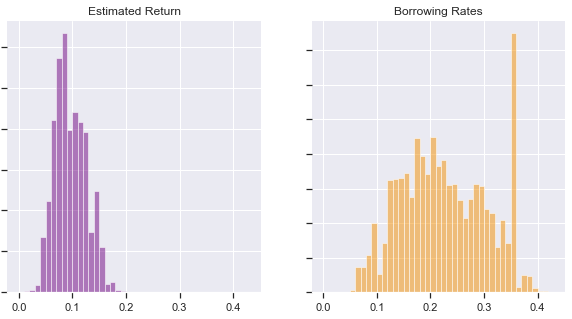

In [13]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

axes = [ax1,ax2]
positions=['right','left','top']
bin_edges1=np.arange(0,max(pl_df["BorrowerAPR"].dropna())+0.01,0.01)
ax1.hist(pl_df["EstimatedReturn"].dropna(), bins = bin_edges1, color = '#6f0382', alpha =0.5);

for ax in axes:
    ax.tick_params(left = 'off', bottom = 'off')
    for pos in positions:
        ax.spines[pos].set_visible(False)
    ax.set_yticklabels('')

ax1.set_title("Estimated Return")
ax2.set_title('Borrowing Rates')

bin_edges2=np.arange(0,max(pl_df["BorrowerAPR"])+0.01,0.01)
ax2.hist(pl_df["BorrowerAPR"], bins=bin_edges2, color = '#f28f02',alpha=0.5);


### Prosper Customer Profile

The distribution of risk follows a plausible bell-shaped curved. Some additional context could be provided by the fact that about 70% of the listings with reported income have stated earnings between  2,500€ - 8,000€ monthly. Hence, we can extrapolate that Prosper tends to attract middle-class borrowers.

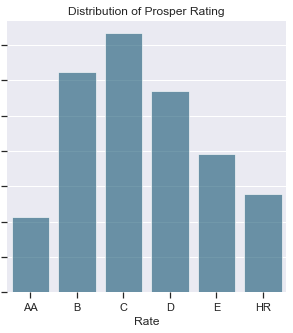

In [15]:
bars= ['AA','B','C','D','E','HR']
f, ax = plt.subplots(figsize=(5,5))

sns.countplot(data = pl_df, x = "ProsperRating", color = '#035a82', order = bars, alpha = 0.6)
sns.despine(left = True, bottom=True)
ax.tick_params(left = 'off', bottom = 'off')
ax.set_yticklabels('')
ax.set_ylabel('')
ax.set_xlabel("Rate")
ax.set_title("Distribution of Prosper Rating");

## Categories are more likely to Default

* 12: Green loans have the lowest Completion Rate but with 10/18 completions it is difficult to say whether the category is necessarily riskier than the others or whether it was just a new type by 2014.

* 16: Motorcycle loans have a particularly high completion rate with 86/94

Overall, we can see that for any category loans are completed more than half the time.

In [18]:
finished_loans = pl_df[(pl_df["LoanStatus"]=="Chargedoff") | (pl_df["LoanStatus"]=="Completed") | (pl_df["LoanStatus"]=="Defaulted") | (pl_df["LoanStatus"]=="Chargedoff") | (pl_df["LoanStatus"]=="FinalPaymentInProgresss")]

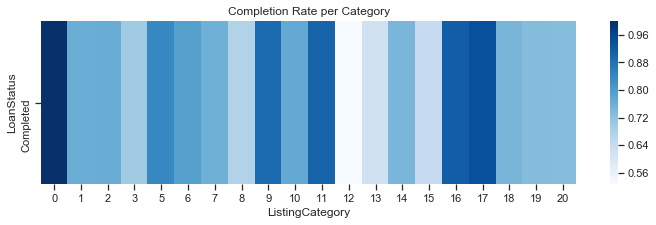

In [19]:
denom = finished_loans.groupby(['ListingCategory']).size()
lcounts =  finished_loans.groupby(["ListingCategory","LoanStatus"]).size()
lprops = lcounts / denom
lprops = lprops.reset_index(name='count')
lprops = lprops.pivot_table(index='LoanStatus',columns='ListingCategory',values = 'count', fill_value = 0)
lprops.drop(["Chargedoff","Defaulted"],inplace=True)
fig, ax = plt.subplots(figsize=(12,3))
sns.heatmap(lprops, cmap="Blues")
ax.tick_params(left = 'off', bottom = 'off')
ax.set_title("Completion Rate per Category");

## Does Term length affects risk?

We can observe that 1-year loans have the lowest history of defaulting with reasonable returns peaking at about 10%; 3-year loans have the widest range of expected returns, with more extreme rates seeming to have lower defaults historically; lastly, 5-year loans have higher returns on average than 1 year but at a much higher risk of default historically

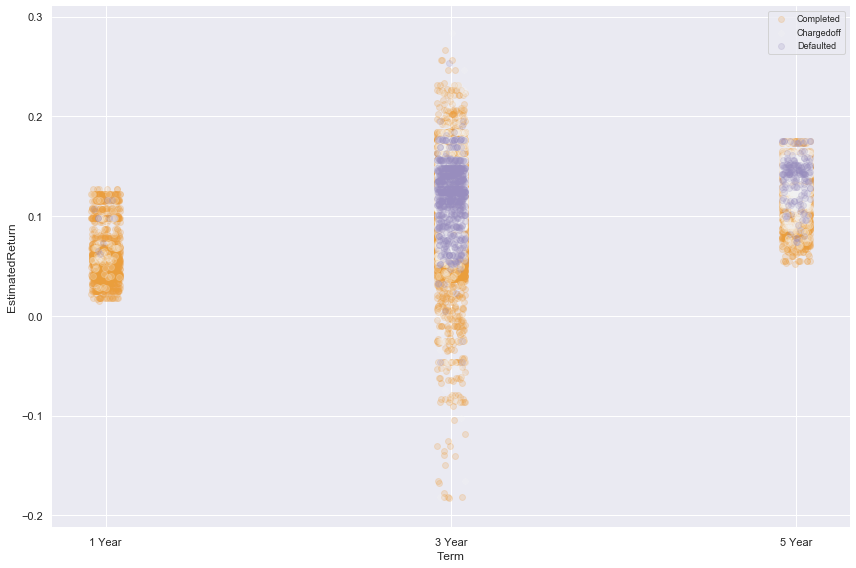

In [23]:
g = sns.FacetGrid(data = pl_df, hue = 'LoanStatus', hue_order = ['Completed','Chargedoff','Defaulted'], palette="PuOr",size = 8 , aspect = 1.5)
g.map(sns.regplot,"Term", "EstimatedReturn", fit_reg = False, x_jitter=True, scatter_kws={'alpha':0.2});
plt.legend(loc=1, fontsize = 9)
g.set(xticks=np.arange(12,84,24),xticklabels=["1 Year", "3 Year", "5 Year" ], alpha=0.0000)
sns.despine(left=True,bottom=True)

## Influence of Risk with Return

The borrowing rates are determined according to the credit rating assigned by Proper, thus,  we can discern how the risk is dispersed amongst the expected returns. In particular, it resembles as an investor should have to tread very lightly with Borrowing APR's over 20% as there is a significantly larger chance of losing substantial portions of their investment.

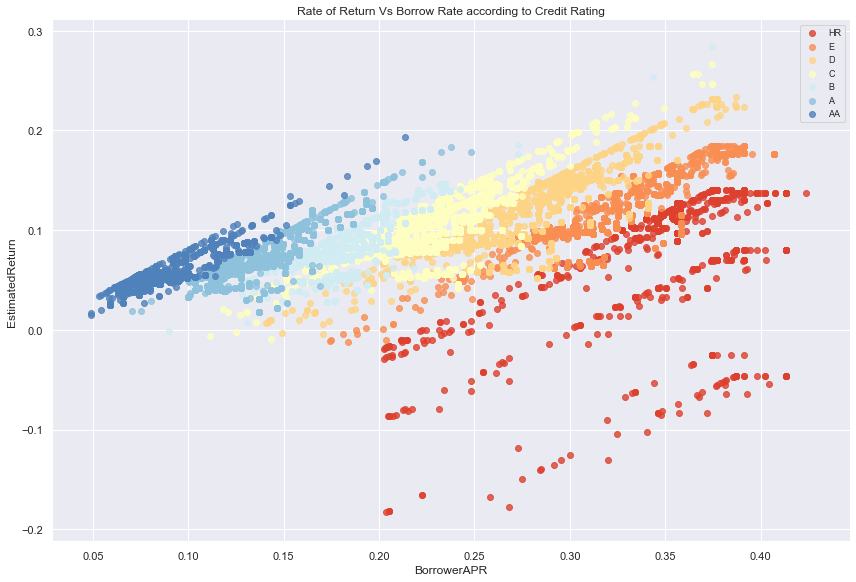

In [24]:
g = sns.FacetGrid(data = pl_df, hue = 'ProsperRating', hue_order = ['HR','E','D','C','B','A','AA'], size = 8, aspect = 1.5, palette="RdYlBu")
g.map(sns.regplot,"BorrowerAPR", "EstimatedReturn", fit_reg = False);
plt.legend(loc=1, fontsize = 9)
plt.title("Rate of Return Vs Borrow Rate according to Credit Rating");